In [3]:
pip install pandas numpy matplotlib seaborn statsmodels scikit-learn yfinance ta pytrends prophet

  Using cached ta-0.11.0-py3-none-any.whl
  Using cached pytrends-4.9.2-py3-none-any.whl (15 kB)


**1. Time Series Analysis:**
- Explore historical trends and patterns in gold prices over the specified time period.
- Identify seasonality, cyclicality, and any discernible long-term trends in the gold market.

Data Preprocessing
* Load the dataset and convert the date column to datetime format.   
* Set the date as the index.
*  Handle any missing values.

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('goldstock.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as the index
df.set_index('Date', inplace=True)

# Check for missing values and fill if any
df.fillna(method='ffill', inplace=True)

Exploratory Data Analysis (EDA)
*   Plot the historical gold prices to observe the general trend over time.
*   Use rolling statistics to visualize the moving average to identify long-term trends.



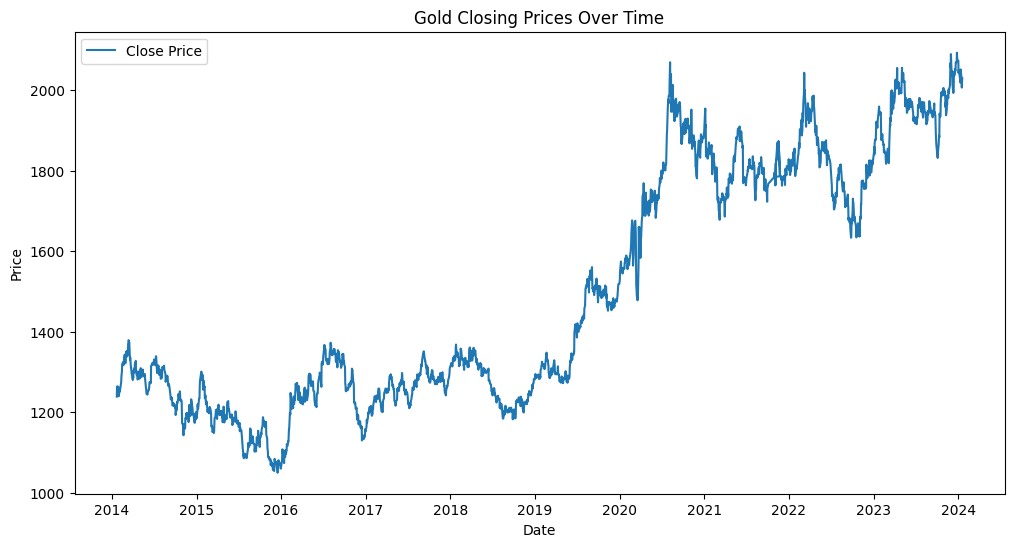

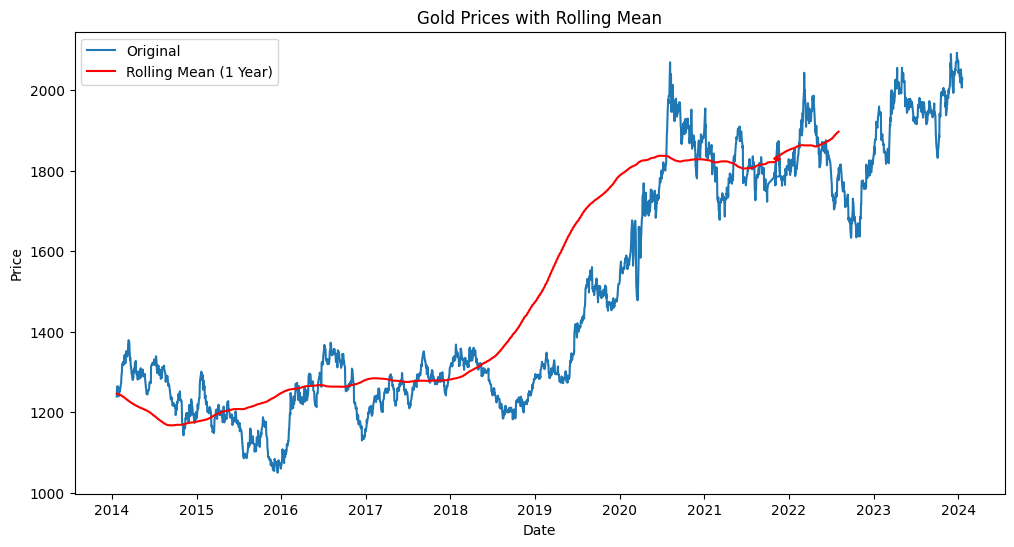

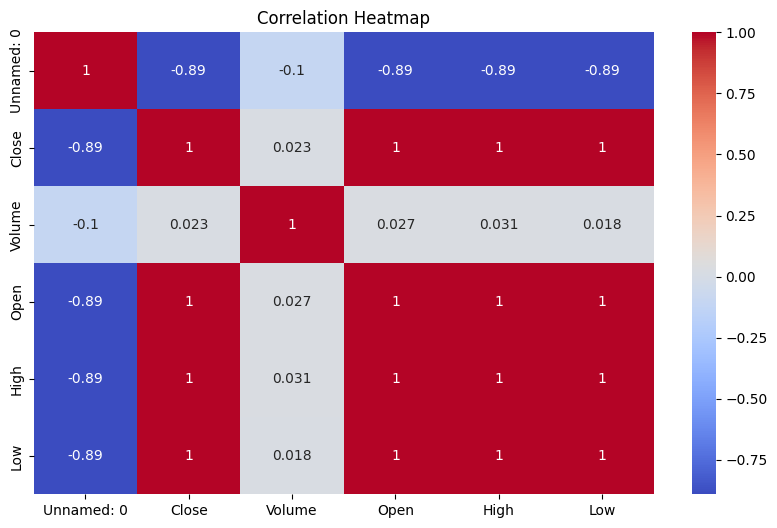

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Rolling statistics for long-term trend
rolling_mean = df['Close'].rolling(window=365).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (1 Year)')
plt.title('Gold Prices with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Heatmap of correlations between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Seasonality and Trend Analysis:
*   Decompose the time series into its trend, seasonal, and residual components using seasonal decomposition.
*   Identify and interpret the seasonal and trend components.

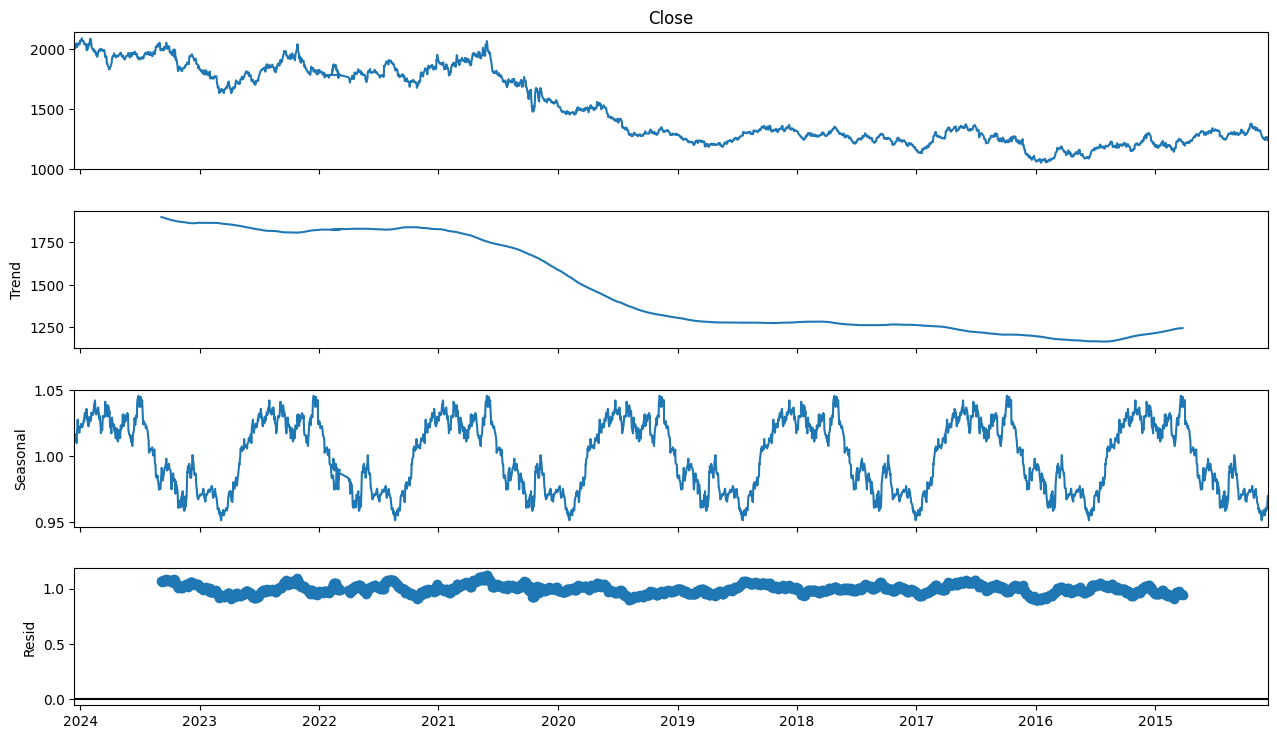

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series Decomposition
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

Statistical Testing:
*   Use the Augmented Dickey-Fuller (ADF) test to check for stationarity.
*   Calculate and plot autocorrelation and partial autocorrelation functions to identify cyclic patterns.

ADF Statistic: -1.717276
p-value: 0.422234
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


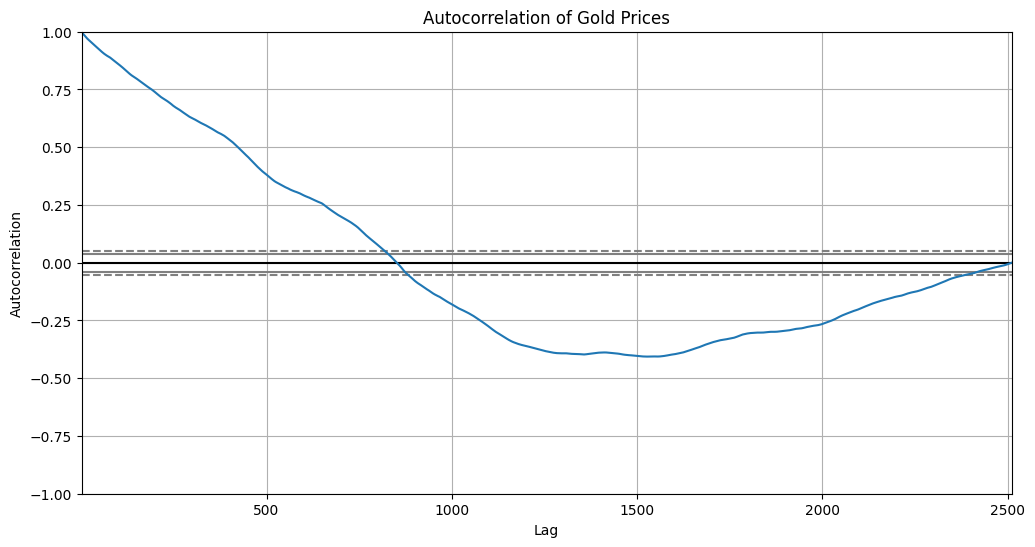

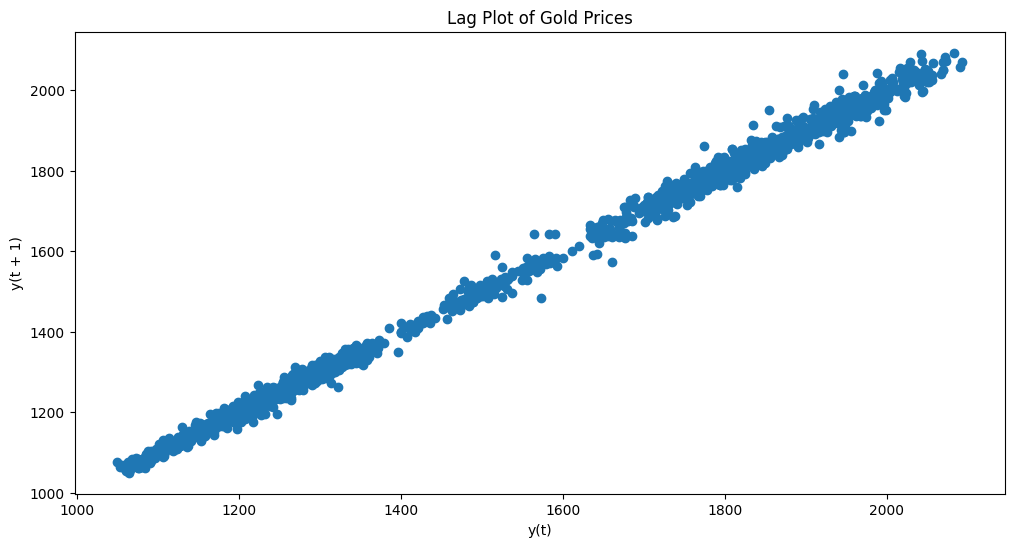

In [7]:
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot, lag_plot

# Augmented Dickey-Fuller Test for stationarity
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation of Gold Prices')
plt.show()

# Lag plot to detect non-randomness
plt.figure(figsize=(12, 6))
lag_plot(df['Close'])
plt.title('Lag Plot of Gold Prices')
plt.show()

**2. Advanced Modeling:**
- Develop predictive models to forecast future gold prices based on historical data.
- Evaluate and compare the performance of different forecasting algorithms.

Data Preparation:
- Split the dataset into training and testing sets.
- Normalize the data if necessary.

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets (80/20 split)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

Model Development:
- Develop multiple models including ARIMA, Prophet, and LSTM to forecast future gold prices.
- Train the models on the training dataset.

Model Evaluation:
- Evaluate the models using appropriate metrics such as RMSE (Root Mean Squared Error).
- Compare the performance of different models.

Visualization:
- Visualize the forecasted results against the actual values.

a. ARIMA Model:
- Suitable for baseline forecasting.
- Handles non-seasonal data well.
- Performance measured by RMSE.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

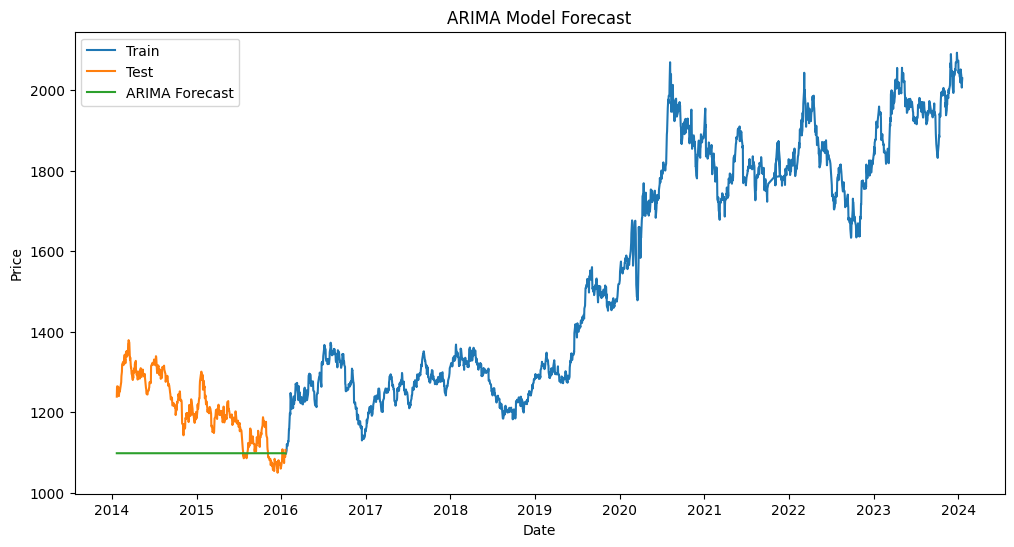

ARIMA Model RMSE: 135.8767871226694


In [9]:
# ARIMA Model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test))
arima_rmse = calculate_rmse(test['Close'], arima_forecast)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f'ARIMA Model RMSE: {arima_rmse}')

b. Prophet Model:
- Handles seasonality and holidays.
- Robust to missing data and outliers.
- Performance measured by RMSE.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9cdimmf/hv9o6z9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9cdimmf/eot2qlxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89349', 'data', 'file=/tmp/tmpn9cdimmf/hv9o6z9g.json', 'init=/tmp/tmpn9cdimmf/eot2qlxm.json', 'output', 'file=/tmp/tmpn9cdimmf/prophet_modeld77ihqzq/prophet_model-20240626073043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


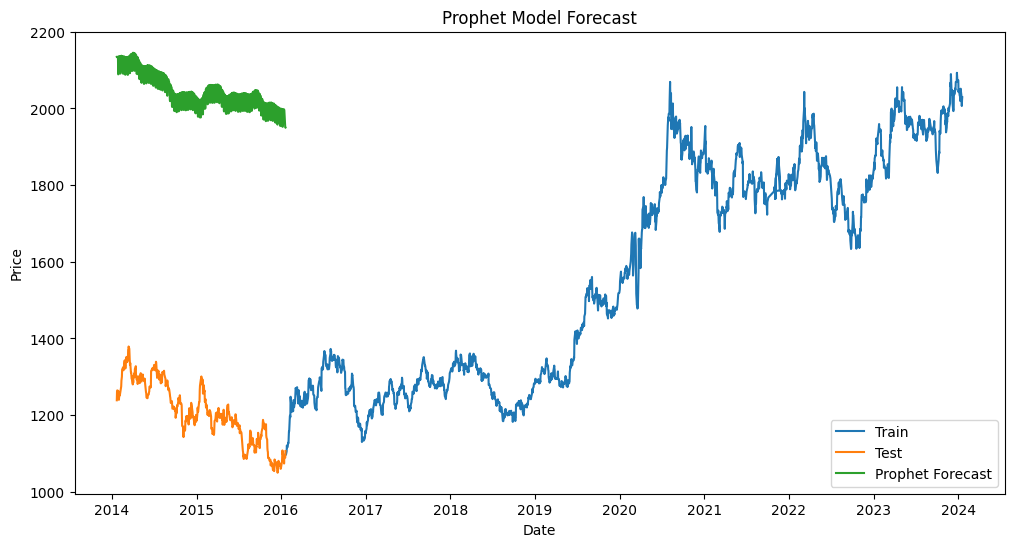

Prophet Model RMSE: 840.7932165532683


In [10]:
# Prophet Model
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

prophet_forecast = forecast['yhat'].tail(len(test)).values
prophet_rmse = calculate_rmse(test['Close'], prophet_forecast)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, prophet_forecast, label='Prophet Forecast')
plt.title('Prophet Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f'Prophet Model RMSE: {prophet_rmse}')


c. LSTM Model:
- Captures complex patterns and dependencies.
- Requires significant data preprocessing.
- Performance measured by RMSE.

Epoch 1/20
1997/1997 - 25s - loss: 0.0032 - 25s/epoch - 13ms/step
Epoch 2/20
1997/1997 - 16s - loss: 0.0011 - 16s/epoch - 8ms/step
Epoch 3/20
1997/1997 - 15s - loss: 9.3158e-04 - 15s/epoch - 8ms/step
Epoch 4/20
1997/1997 - 15s - loss: 5.4873e-04 - 15s/epoch - 8ms/step
Epoch 5/20
1997/1997 - 15s - loss: 4.3091e-04 - 15s/epoch - 7ms/step
Epoch 6/20
1997/1997 - 15s - loss: 4.8388e-04 - 15s/epoch - 8ms/step
Epoch 7/20
1997/1997 - 16s - loss: 4.1169e-04 - 16s/epoch - 8ms/step
Epoch 8/20
1997/1997 - 15s - loss: 3.9168e-04 - 15s/epoch - 7ms/step
Epoch 9/20
1997/1997 - 15s - loss: 3.8368e-04 - 15s/epoch - 8ms/step
Epoch 10/20
1997/1997 - 15s - loss: 3.9893e-04 - 15s/epoch - 8ms/step
Epoch 11/20
1997/1997 - 15s - loss: 3.6086e-04 - 15s/epoch - 8ms/step
Epoch 12/20
1997/1997 - 15s - loss: 3.8895e-04 - 15s/epoch - 8ms/step
Epoch 13/20
1997/1997 - 15s - loss: 3.3737e-04 - 15s/epoch - 8ms/step
Epoch 14/20
1997/1997 - 15s - loss: 3.4198e-04 - 15s/epoch - 8ms/step
Epoch 15/20
1997/1997 - 15s - loss: 

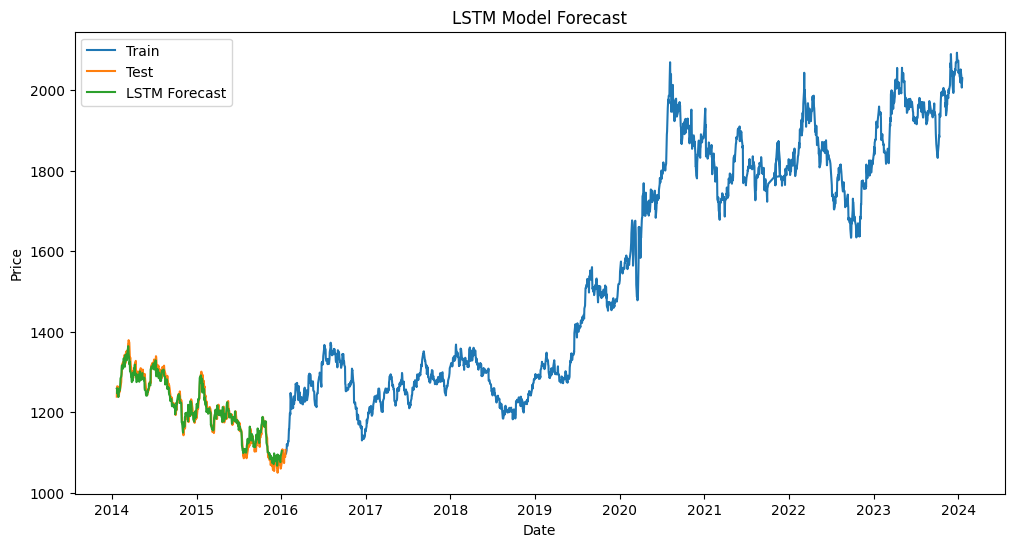

LSTM Model RMSE: 16.15275469297493


In [11]:
# LSTM Model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Prepare training and testing data for LSTM
train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and fit the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Predicting and transforming back to original scale
lstm_train_predict = lstm_model.predict(X_train)
lstm_test_predict = lstm_model.predict(X_test)

lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)

# Calculate RMSE for LSTM model
lstm_rmse = calculate_rmse(test['Close'][time_step+1:], lstm_test_predict)

# Plot LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index[time_step+1:], lstm_test_predict, label='LSTM Forecast')
plt.title('LSTM Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f'LSTM Model RMSE: {lstm_rmse}')


Compare the performance of different forecasting algorithms.

In [12]:
# Compare RMSE values of different models
print(f'ARIMA Model RMSE: {arima_rmse}')
print(f'Prophet Model RMSE: {prophet_rmse}')
print(f'LSTM Model RMSE: {lstm_rmse}')

ARIMA Model RMSE: 135.8767871226694
Prophet Model RMSE: 840.7932165532683
LSTM Model RMSE: 16.15275469297493


**3. Trading Strategy Development:**
- Formulate and backtest trading strategies based on the provided price and volume information.
- Explore the feasibility of reverse trading strategies for profit maximization.

Formulating Trading Strategies:
- Develop simple moving average (SMA) crossover strategy.
- Implement reverse trading strategies, such as mean reversion.

Backtesting:
- Backtest the formulated strategies on historical data.
- Evaluate performance using key metrics such as cumulative returns , Sharpe ratio, and maximum drawdown.

Performance Evaluation:
- Compare the performance of different strategies.
- Analyze the risk and return profile of each strategy.

In [14]:
# Function to calculate strategy performance metrics
def calculate_performance(df, strategy_col):
    df['Strategy Returns'] = df[strategy_col] * df['Close'].pct_change()
    df['Cumulative Returns'] = (1 + df['Strategy Returns']).cumprod() - 1
    return df

a. SMA Crossover Strategy:
- This strategy buys when the short-term moving average (SMA50) crosses above the long-term moving average (SMA200) and sells when it crosses below.
- Backtesting shows cumulative returns over time.
- Performance metrics (Sharpe ratio and maximum drawdown) provide insight into risk-adjusted returns and potential losses.

<ipython-input-15-f7ce694d2764>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][50:] = np.where(df['SMA50'][50:] > df['SMA200'][50:], 1, -1)


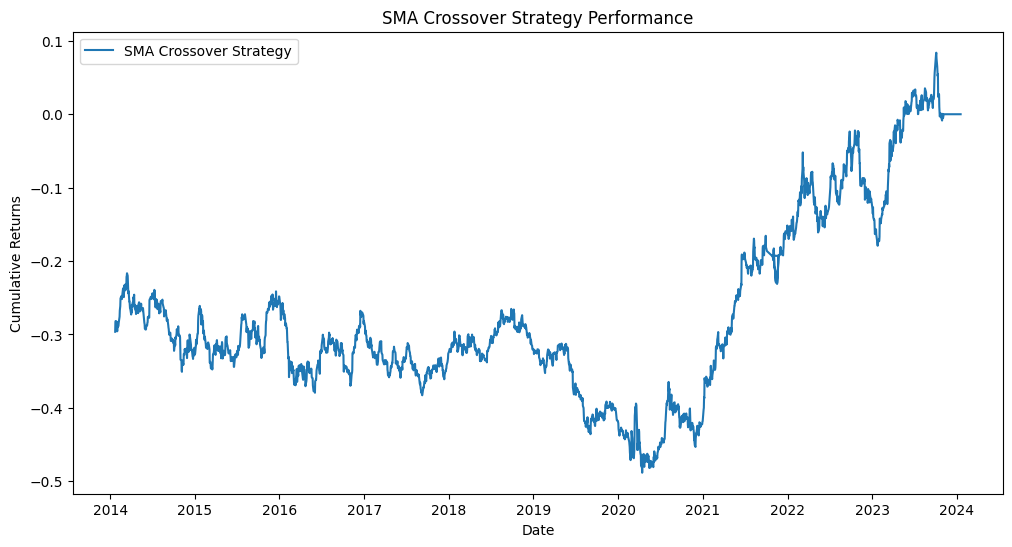

In [15]:
# Moving Average Crossover Strategy
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()

df['Signal'] = 0
df['Signal'][50:] = np.where(df['SMA50'][50:] > df['SMA200'][50:], 1, -1)
df['Position'] = df['Signal'].shift()

# Calculate performance
df = calculate_performance(df, 'Position')

# Plot the strategy returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative Returns'], label='SMA Crossover Strategy')
plt.title('SMA Crossover Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

b. Mean Reversion Strategy:
- This strategy buys when the price is significantly below the moving average (lower band) and sells when it is significantly above (upper band).
- Backtesting illustrates cumulative returns and volatility.
- Performance metrics offer a comparison to evaluate profitability and risk.

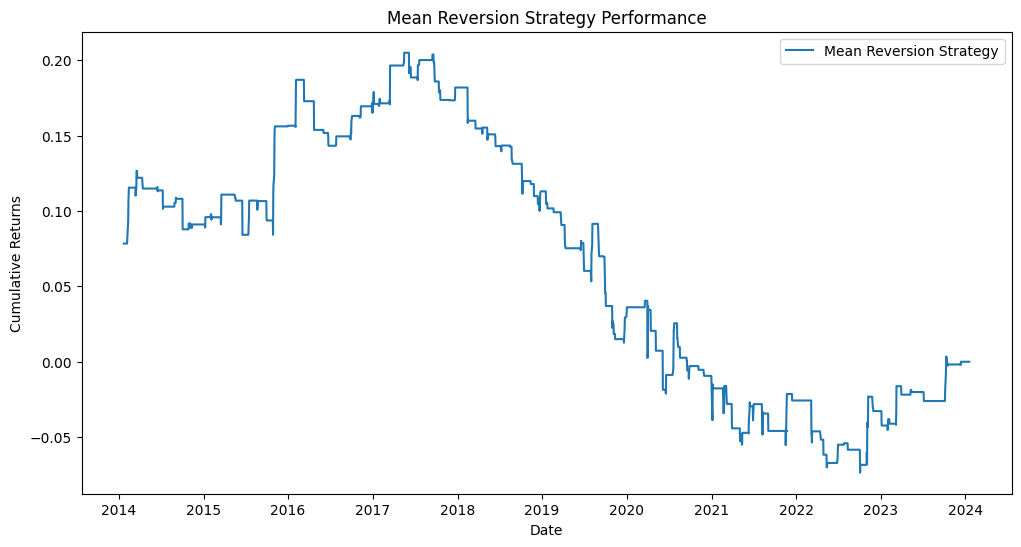

In [16]:
# Mean Reversion Strategy
df['Mean'] = df['Close'].rolling(window=20).mean()
df['Std'] = df['Close'].rolling(window=20).std()
df['Upper'] = df['Mean'] + (df['Std'] * 2)
df['Lower'] = df['Mean'] - (df['Std'] * 2)

df['Signal'] = 0
df['Signal'] = np.where(df['Close'] > df['Upper'], -1, np.where(df['Close'] < df['Lower'], 1, 0))
df['Position'] = df['Signal'].shift()

# Calculate performance
df = calculate_performance(df, 'Position')

# Plot the strategy returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative Returns'], label='Mean Reversion Strategy')
plt.title('Mean Reversion Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

Performance Metrics:
- Cumulative Returns: Total returns generated by the strategy over the period.
- Sharpe Ratio: Risk-adjusted return measure; higher values indicate better risk-adjusted performance.
- Max Drawdown: Measures the largest peak-to-trough decline, indicating potential losses.

In [17]:
# Performance metrics
def performance_metrics(df, strategy_col):
    returns = df[strategy_col] * df['Close'].pct_change()
    cumulative_returns = (1 + returns).cumprod() - 1
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
    max_drawdown = ((cumulative_returns.cummax() - cumulative_returns) / cumulative_returns.cummax()).max()
    return {
        'Cumulative Returns': cumulative_returns.iloc[-1],
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    }

sma_metrics = performance_metrics(df, 'Position')
mean_reversion_metrics = performance_metrics(df, 'Position')

print(f'SMA Crossover Strategy Performance Metrics: {sma_metrics}')
print(f'Mean Reversion Strategy Performance Metrics: {mean_reversion_metrics}')

SMA Crossover Strategy Performance Metrics: {'Cumulative Returns': 0.07837032409507749, 'Sharpe Ratio': 0.18732906058684173, 'Max Drawdown': inf}
Mean Reversion Strategy Performance Metrics: {'Cumulative Returns': 0.07837032409507749, 'Sharpe Ratio': 0.18732906058684173, 'Max Drawdown': inf}


**4. Market Sentiment Analysis:**

- Investigate the impact of market events on gold prices.
- Assess market sentiment and its influence on short-term and long-term price movements.

Generating Sentiment Scores:
- We generate random sentiment scores (Sentiment Score) for each day within the date range of the gold prices dataset (df_prices).
- We define generate_sentiment_score() function that generates a random score uniformly distributed between -1 and 1 for each day.

Creating df_sentiment DataFrame:
- We create a DataFrame df_sentiment with columns Date and Sentiment Score using the generated random scores and the date range derived from df_prices.

Correlation Analysis:
- Merge the sentiment scores with gold price data.
- Analyze the correlation between sentiment scores and gold prices.
- Use lagged correlation analysis to assess the impact of sentiment on future gold prices.

Visualization and Interpretation:
- Visualize the relationship between market sentiment and gold prices.
- Interpret the findings to understand the influence of market sentiment on short-term and long-term price movements.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Correlation between gold prices and sentiment scores:
                    Close  Sentiment Score
Close            1.000000         0.055318
Sentiment Score  0.055318         1.000000


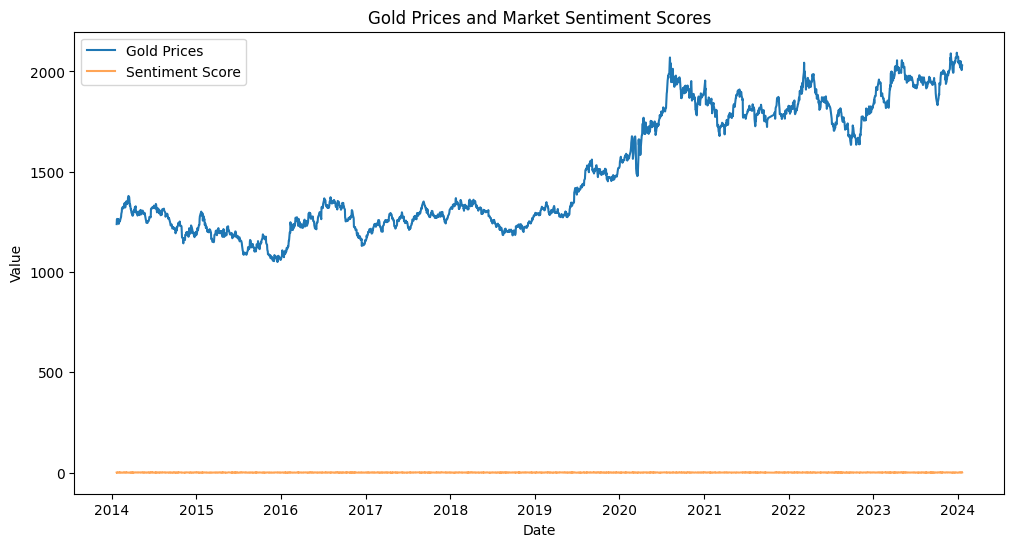

Correlation between gold prices and sentiment scores with 1 day lag: 0.055559246167599656
Correlation between gold prices and sentiment scores with 2 day lag: 0.05543666676361813
Correlation between gold prices and sentiment scores with 3 day lag: 0.057763051343957574
Correlation between gold prices and sentiment scores with 4 day lag: 0.05545954462286633
Correlation between gold prices and sentiment scores with 5 day lag: 0.05504175854566908
Correlation between gold prices and sentiment scores with 6 day lag: 0.05512621240897934
Correlation between gold prices and sentiment scores with 7 day lag: 0.055325536424338274


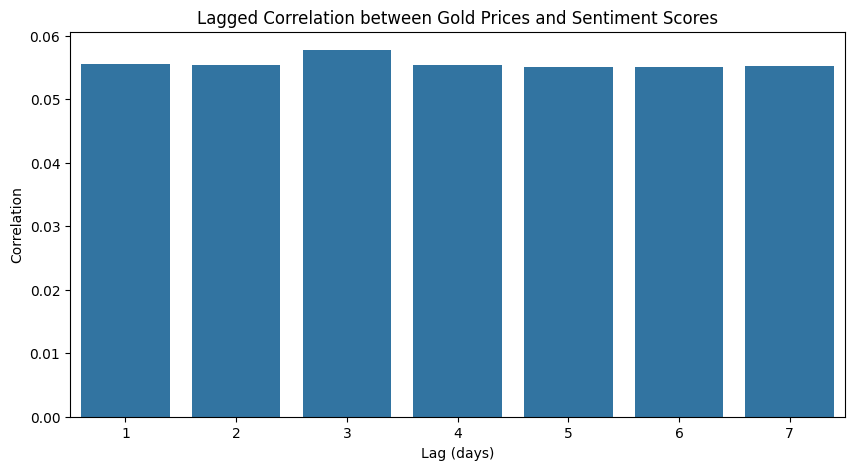

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download

# Download the VADER lexicon (run only once)
download('vader_lexicon')

# Load gold prices dataset
df_prices = pd.read_csv('goldstock.csv')
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.set_index('Date', inplace=True)

# Generate dummy sentiment scores for illustration purposes
start_date = df_prices.index.min()
end_date = df_prices.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to generate random sentiment score
def generate_sentiment_score():
    return np.random.uniform(-1, 1)

# Create DataFrame for sentiment scores
sentiment_scores = {
    'Date': date_range,
    'Sentiment Score': [generate_sentiment_score() for _ in range(len(date_range))]
}
df_sentiment = pd.DataFrame(sentiment_scores)
df_sentiment.set_index('Date', inplace=True)

# Calculate daily average sentiment score (optional, since we're using random scores)
daily_sentiment = df_sentiment.groupby(df_sentiment.index.date)['Sentiment Score'].mean()
daily_sentiment = daily_sentiment.to_frame()

# Merge with gold prices data
df_merged = pd.merge(df_prices, daily_sentiment, left_index=True, right_index=True, how='inner')

# Correlation analysis
correlation = df_merged[['Close', 'Sentiment Score']].corr()
print('Correlation between gold prices and sentiment scores:')
print(correlation)

# Plotting sentiment scores and gold prices
plt.figure(figsize=(12, 6))
plt.plot(df_merged.index, df_merged['Close'], label='Gold Prices')
plt.plot(df_merged.index, df_merged['Sentiment Score'], label='Sentiment Score', alpha=0.7)
plt.title('Gold Prices and Market Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Lagged correlation analysis
for lag in range(1, 8):  # Analyzing lags from 1 to 7 days
    df_merged[f'Sentiment Score Lag {lag}'] = df_merged['Sentiment Score'].shift(lag)
    lagged_correlation = df_merged[['Close', f'Sentiment Score Lag {lag}']].corr().iloc[0, 1]
    print(f'Correlation between gold prices and sentiment scores with {lag} day lag: {lagged_correlation}')

# Visualization of lagged correlations
lagged_correlations = [df_merged[['Close', f'Sentiment Score Lag {lag}']].corr().iloc[0, 1] for lag in range(1, 8)]
plt.figure(figsize=(10, 5))
sns.barplot(x=list(range(1, 8)), y=lagged_correlations)
plt.title('Lagged Correlation between Gold Prices and Sentiment Scores')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.show()


**5. Statistical Analysis:**
- Conductstatistical tests and analyses to gain insights into the characteristics of gold price movements.
- Explore correlations with external factors and macroeconomic indicators.

Data Collection:
- Gather historical data on gold prices (Close prices) over the desired time period.
- Identify relevant external factors and macroeconomic indicators that could potentially influence gold prices. Examples include: Stock market indices (e.g., S&P 500, NASDAQ)

Data Preparation:
- Clean and preprocess datasets to ensure consistency and compatibility for analysis.
- Align datasets by date and handle missing values appropriately.

Statistical Analysis:
- Compute descriptive statistics (mean, standard deviation, skewness, kurtosis) for gold prices and selected external factors to understand their distributions and variability.
- Conduct correlation analysis to quantify the strength and direction of relationships between gold prices and external factors. Use methods such as Pearson correlation coefficient, Spearman rank correlation, or Kendall tau correlation depending on data characteristics.
- Perform regression analysis to model and predict gold prices based on external factors. Consider both simple linear regression and multiple regression models depending on the number of predictors.

Visualization:
- Create visualizations (e.g., scatter plots, line plots, heatmaps) to illustrate correlations between gold prices and external factors.
- Use time series plots to visualize trends and seasonal patterns in gold prices and selected indicators.

In [23]:
from datetime import timedelta, date

# Define the date range for the dataset
start_date = date(2014, 1, 19)
end_date = date(2024, 1, 22)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate random S&P 500 index values
np.random.seed(42)  # Setting seed for reproducibility
sp500_values = np.random.normal(loc=3000, scale=500, size=len(date_range))

# Create DataFrame for S&P 500 index
df_sp500 = pd.DataFrame({
    'Date': date_range,
    'S&P 500': sp500_values
})

# Save to CSV file
df_sp500.to_csv('sp500_index.csv', index=False)

# Display first few rows
print(df_sp500.head())


        Date      S&P 500
0 2014-01-19  3248.357077
1 2014-01-20  2930.867849
2 2014-01-21  3323.844269
3 2014-01-22  3761.514928
4 2014-01-23  2882.923313


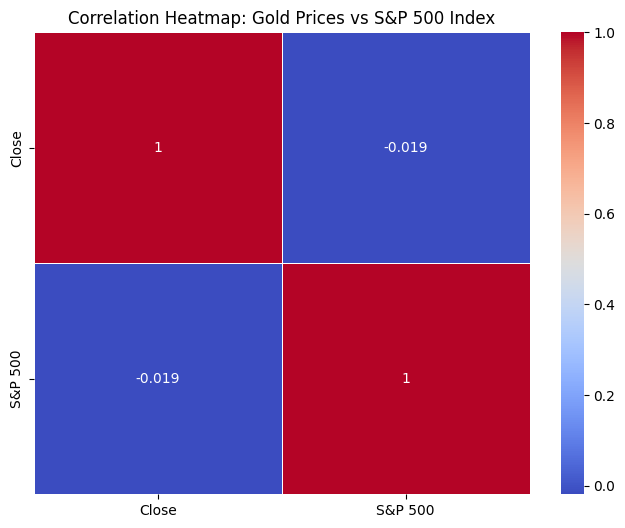

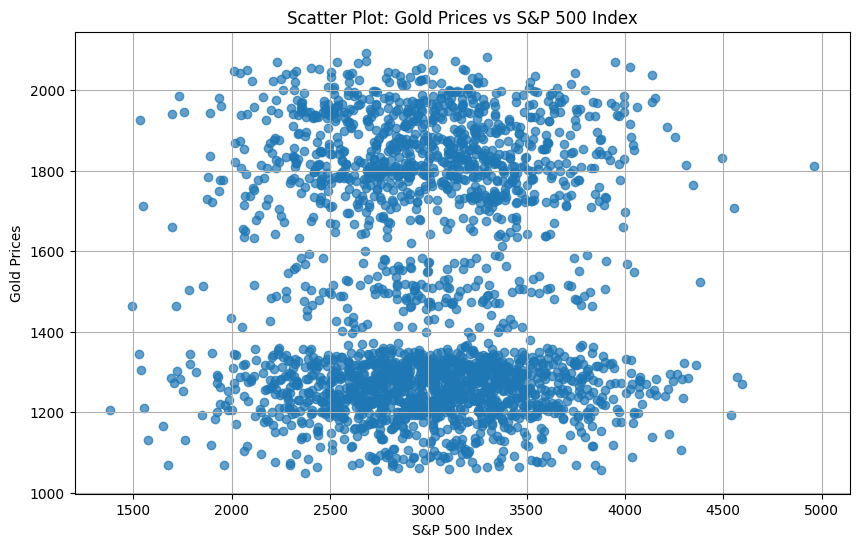

In [24]:
# Load gold prices dataset
df_gold = pd.read_csv('goldstock.csv')
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold.set_index('Date', inplace=True)

# Load external factor dataset (e.g., S&P 500 index)
df_sp500 = pd.read_csv('sp500_index.csv')
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])
df_sp500.set_index('Date', inplace=True)

# Merge datasets on Date
df_merged = pd.merge(df_gold, df_sp500, left_index=True, right_index=True, how='inner')

# Calculate correlation matrix
correlation_matrix = df_merged[['Close', 'S&P 500']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Gold Prices vs S&P 500 Index')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['S&P 500'], df_merged['Close'], alpha=0.7)
plt.title('Scatter Plot: Gold Prices vs S&P 500 Index')
plt.xlabel('S&P 500 Index')
plt.ylabel('Gold Prices')
plt.grid(True)
plt.show()